In [1]:
!pip install tk
!pip install PyScreenshot



[notice] A new release of pip available: 22.3 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
from tkinter import *
from tkinter.ttk import Scale
from tkinter import colorchooser,filedialog,messagebox
import pyscreenshot as ImageGrab
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

#import PIL.ImageGrab as ImageGrab
ndrones = None

In [128]:
class Draw():
    def __init__(self,root):
        self.old_x = None
        self.old_y = None
#Defining title and Size of the Tkinter Window GUI
        self.root =root
        self.root.title("Pattern for swarm")
        self.root.geometry("1000x400")
        self.root.configure(background="white")
        self.root.resizable(0,0)
 
#variables for pointer and Eraser   
        self.pointer= "black"
        self.erase="white"

#Widgets for Tkinter Window
       
# Configure the alignment , font size and color of the text
        text=Text(root)
        text.tag_configure("tag_name", justify='center', font=('calibri',25),background='#292826',foreground='white')

# Insert a Text
        text.insert("1.0", "Draw drone pattern")

# Add the tag for following given text
        text.tag_add("tag_name", "1.0", "end")
        text.pack()


# enter text

        self.ndroness = Entry(root)
        self.ndroness.pack(pady=30)
        self.ndroness.place(relx = 0.5,rely=0.95, anchor=CENTER)
        
# Draw button
        self.drawbtn= Button(self.root,text="Draw",bd=4,bg='white',command=self.cpaint,width=9,relief=RIDGE)
        self.drawbtn.place(relx = 0.20,rely=0.95, anchor=CENTER)       
        
  #exit button      
        self.exit_button = Button(self.root, text="Exit and Save Coordinates", bd=4, bg='white',command=root.destroy,relief=RIDGE)
        self.exit_button.place(relx = 0.85,rely=0.95, anchor=CENTER)       
        
 # Erase Button and its properties   
        self.eraser_btn= Button(self.root,text="Eraser",bd=4,bg='white',command=self.eraser,width=9,relief=RIDGE)
        self.eraser_btn.place(relx = 0.35,rely=0.95, anchor=CENTER)

# Reset Button to clear the entire screen 
        self.clear_screen= Button(self.root,text="Clear Screen",bd=4,bg='white',command= self.clear,width=9,relief=RIDGE)
        self.clear_screen.place(relx = 0.70,rely=0.95, anchor=CENTER)

# Save Button for saving the image in local computer
        self.savendrones_btn= Button(self.root,text="Save number of drones",bd=4,bg='white',command=self.save_drawing, relief=RIDGE)
        self.savendrones_btn.place(relx = 0.55,rely=0.95, anchor=CENTER)


#Defining a background color for the Canvas 
        self.background = Canvas(self.root,bg='white',bd=5,relief=GROOVE,height=300,width=600)
        self.background.place(relx = 0.5, rely = 0.5, anchor=CENTER)


#Bind the background Canvas with mouse click
        self.background.bind("<B1-Motion>",self.paint) 


# Functions are defined here

# Paint Function for Drawing the lines on Canvas
    def paint(self,event):       
        x2,y2 = (event.x), (event.y)  
        if self.old_x and self.old_y:
             self.background.create_line(x2-1,y2-1,x2,y2,fill=self.pointer,capstyle=ROUND,smooth='true',width=5)
             xcoords.append(1000-x2)
             ycoords.append(400-y2)
        self.old_x = x2
        self.old_y = y2

# Function for defining the eraser
    def eraser(self):
        self.pointer= self.erase
        self.old_x = None
        self.old_y = None
    
    def cpaint(self):
        self.pointer= 'black'
        self.old_x = None
        self.old_y = None
    
    def clear(self):
        self.background.delete('all')
        xcoords = []
        ycoords= []

# Function for saving the image file in Local Computer
    def save_drawing(self):
        global ndrones
        try:
            ndrones = self.ndroness.get()
            print(ndrones)
        except:
            print("Error in saving the screenshot")
            


In [130]:
xcoords=[]
ycoords=[]

if __name__ =="__main__":
    root = Tk()
    p= Draw(root)
    root.mainloop()

In [104]:
ndrones = int(ndrones)

In [105]:
points = np.column_stack( (xcoords, ycoords) )

In [106]:
points.shape

(85, 2)

In [107]:
mprev = None
mcurr = None
fx=[] 
fy=[]

i=0
k= int( len(points)/ndrones )
while i<len(points):
#     if i==0:
#         continue
#     if i==1:
#         if points[i][0]-points[i-1][0]==0:
#             mcurr =  (points[i][1]-points[i-1][1]) / 0.001
#         else:
#             mcurr = (points[i][1]-points[i-1][1]) / (points[i][0]-points[i-1][0])
#     else:
#         mprev = mcurr
#         if points[i][0]-points[i-1][0]==0:
#             mcurr =  (points[i][1]-points[i-1][1]) / 0.001
#         else:
#             mcurr = (points[i][1]-points[i-1][1]) / (points[i][0]-points[i-1][0])
#         if mcurr-mprev > 1:
#             fx.append( points[i][0] )
#             fy.append( points[i][1] )
    fx.append( points[i][0] )
    fy.append( points[i][1] )
    i = i+k

In [108]:
def perimeter(x,y):
    n=len(x)
    p=0
    for i in range(1,n):
        dx=x[i]-x[i-1]
        dy=y[i]-y[i-1]
        dp= np.sqrt(dx**2+dy**2)
        p+=dp
    return p

In [109]:
def dist(a,b,c,d):
    return np.sqrt((a-c)**2 + (b-d)**2)

In [110]:
def slope(a,b,c,d):
    dx=c-a
    dy=d-b
    theta=np.arctan2(dy,dx)
    return theta

In [111]:
theta=slope(0,0,1,1)
theta

0.7853981633974483

In [112]:
x,y =points[:,0], points[:,1]
p=perimeter(x,y)
p

376.8459088424547

In [113]:
d= p/(ndrones+1)
fx=[] #feature points
fy=[]
fpx=x[0]
fpy=y[0]

fx.append(fpx)
fy.append(fpy)
for i in range(1, len(x)):
    cx=x[i]
    cy=y[i]
    
    px=x[i-1]
    py=y[i-1]
    
    cd=dist(cx,cy,fpx,fpy)
    
    if(abs(cd-d)<=0.1):
        
        fx.append(cx)
        fy.append(cy)
        fpx=cx
        fpy=cy
        
        
    elif(cd>d and cd < 1.5*d):
        
        theta=slope(cx,cy,px,py)
        r=cd-d
        
        cx= cx-r*np.cos(theta)
        cy= cy-r*np.sin(theta)
        fx.append(cx)
        fy.append(cy)
        fpx=cx
        fpy=cy

    if(len(fx)==ndrones-1):
        break
        
        

fx.append( x[len(x)-1] )
fy.append( y[len(y)-1] )
print(len(fx))
    




11


In [114]:
def find_centre(x, y):
    cp = 0
    
    for i in range(1, len(x)):
        
        cp += dist( x[i], y[i], x[i-1], y[i-1] )
        if cp > p/2:
            return i
            

In [115]:
def calcmindis(x,y,fx,fy):
    currmindis=1e9
    for i in range(0,len(fx)):
        dis=dist(x,y,fx[i],fy[i])
        if(dis <=currmindis):
            currmindis=dis
    return currmindis
            
    
    
    

In [116]:
idx = find_centre(x, y)
xc = x[idx]
yc = y[idx]
print(xc,yc)

726 204


In [117]:
import copy

In [118]:
d=(p/ndrones)*0.5

fpx= xc
fpy= yc

rem = ndrones - len(fx)
pl = rem//2
pr = rem-pl
fxold=copy.deepcopy(fx)
fyold=copy.deepcopy(fy)
tol= 10

for i in range(1,idx):
    cx=x[idx-i]
    cy=y[idx-1]
    
    px=x[idx-i-1]
    py=y[idx-i-1]
    
    cd=dist(cx,cy,fpx,fpy)
    r=cd-d
    
    if(abs(r)<=0.1):
        currmindis=calcmindis(cx,cy,fx,fy)
        
        if(currmindis>tol):
            print(currmindis,tol,'appending')
            fx.append(cx)
            fy.append(cy)
            fpx=cx
            fpy=cy
            pl-=1
        else:
            continue
        
    elif(cd>d and cd<1.5*d):
        
        theta=slope(cx,cy,px,py)
        r=cd-d
        cx= cx+r*np.cos(theta)
        cy= cy+r*np.sin(theta)
        currmindis=calcmindis(cx,cy,fx,fy)
        
        if(currmindis>tol):
            print(currmindis,tol,'appending')
            fx.append(cx)
            fy.append(cy)
            fpx=cx
            fpy=cy
            pl-=1
        else:
            continue
      
            
    if pl==0:
        break
        

        
        

        
        
    

In [119]:
fpx= xc
fpy= yc


for i in range(idx+1,len(x)):
    cx=x[i]
    cy=y[i]
    
    px=x[i-1]
    py=y[i-1]
    
    cd=dist(cx,cy,fpx,fpy)
    r=cd-d
    
    if(abs(r)<=0.1):
        currmindis=calcmindis(cx,cy,fx,fy)
        
        if(currmindis>tol):
            print(currmindis,tol,'appending')
            fx.append(cx)
            fy.append(cy)
            fpx=cx
            fpy=cy
            pr-=1
        else:
            continue
        
        
    elif(cd>d and cd <1.5*d):
        
        theta=slope(cx,cy,px,py)
        
        cx= cx-r*np.cos(theta)
        cy= cy-r*np.sin(theta)
        currmindis=calcmindis(cx,cy,fx,fy)
        
        if(currmindis>tol):
            print(currmindis,tol,'appending')
            fx.append(cx)
            fy.append(cy)
            fpx=cx
            fpy=cy
            pr-=1
        else:
            continue
        
            
    if pr==0:
        break

In [120]:
len(fx)

11

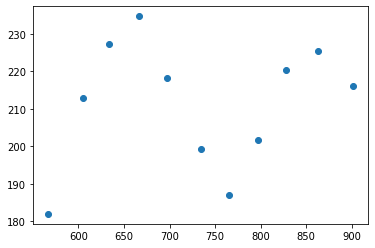

In [121]:
plt.scatter(fx, fy)

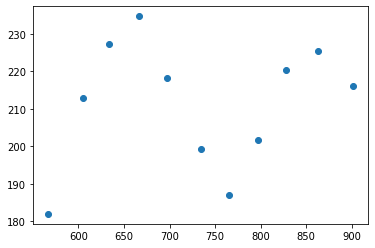

In [122]:
plt.scatter(fxold, fyold)

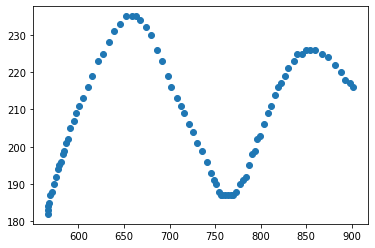

In [123]:
plt.scatter(x, y)